In [40]:
import numpy as np
import matplotlib.pyplot as plt
import shutil
import os
from skimage.io import imread
from skimage.io import imsave

In [16]:
testList = []
with open('adobe-split.txt', 'r') as f:
    lines = f.readlines()
    for il in lines:
        myLine = il[:-2].split(' ')
        if myLine[0] == 'test':
            testList.append(myLine[1])
print(testList)

['Adobe-240-fps/IMG_0038', 'Adobe-240-fps/IMG_0004b', 'Adobe-240-fps/IMG_0156', 'Adobe-240-fps/IMG_0036', 'Adobe-240-fps/IMG_0056', 'Adobe-240-fps/GOPR9660', 'Adobe-240-fps/IMG_0169', 'Adobe-240-fps/IMG_0040', 'Adobe-240-fps/IMG_0001', 'Adobe-240-fps/IMG_0034', 'Adobe-240-fps/GOPR9642', 'Adobe-240-fps/IMG_0150', 'Adobe-240-fps/IMG_0151', 'Adobe-240-fps/IMG_0019', 'Adobe-240-fps/GOPR9637b', 'Adobe-240-fps/GOPR9656', 'Adobe-240-fps/IMG_0157', 'Adobe-240-fps/IMG_0154', 'Adobe-240-fps/IMG_0025', 'Adobe-240-fps/GOPR9650', 'Adobe-240-fps/IMG_0044', 'Adobe-240-fps/IMG_0033']


IMG_0044
(40, 720, 1280, 3)


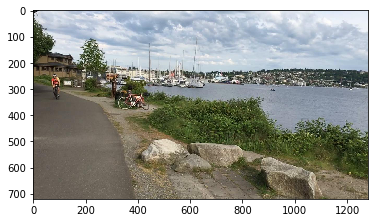

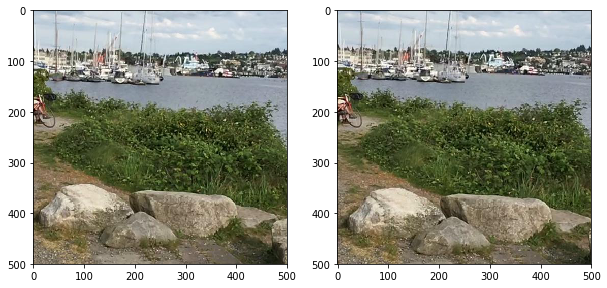

In [118]:
testVidIdx = 20
img_sz = 500
startFrameIdx = 100
vidBaseName = testList[testVidIdx][14:]
print(vidBaseName)

img = np.array([imread(os.path.join('/home/winston/data', testList[testVidIdx], '%04d.jpg' % (i + startFrameIdx)))
                for i in range(40)])
print(np.shape(img))
plt.figure()
plt.imshow(img[0])
cropXY = [400, 150]
imgCrop = img[:, cropXY[1]:(cropXY[1]+img_sz), cropXY[0]:(cropXY[0]+img_sz),:]
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(imgCrop[0])
plt.subplot(122)
plt.imshow(imgCrop[39])

In [119]:
# save files
if os.path.isdir(os.path.join('adobe-test', vidBaseName)):
    shutil.rmtree(os.path.join('adobe-test', vidBaseName))
os.mkdir(os.path.join('adobe-test', vidBaseName))
os.mkdir(os.path.join('adobe-test', vidBaseName, 'clip'))
for i in range(np.size(imgCrop, 0)):
    imsave(os.path.join('adobe-test', vidBaseName, 'clip', '%02d.png' % i), imgCrop[i])